In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**(a)**

In [ ]:
data = pd.read_csv(r"/content/toydata.csv")
data.head()

,Feature1,Feature2,Label
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1


**(b)**

In [ ]:
target = data.Label
data = data.drop(['Label'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(data, target, train_size= 0.8, test_size=0.2, random_state=42)

**(c),(d),(e),(f)**

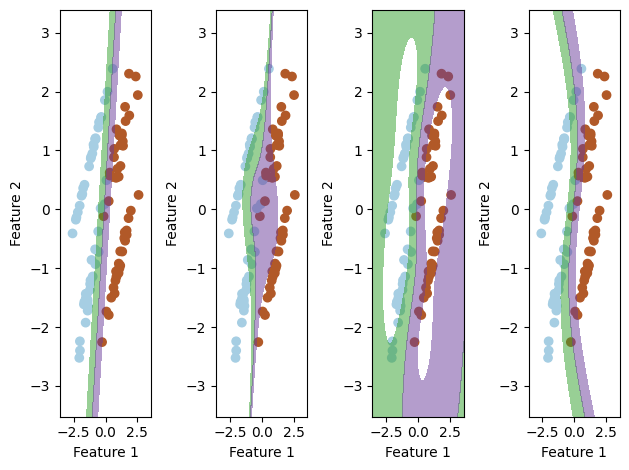

*****ACCURACY*****
linear: 0.95
poly: 0.9
rbf: 1.0
sigmoid: 0.95


In [ ]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
models = []
accuracy_res = []

x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

X_train = X_train.values
X_test = X_test.values

for i, kernel in enumerate(kernels):
  model = svm.SVC(kernel=kernel)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)

  accuracy_res.append(accuracy_score(Y_test,y_pred))
  models.append(model)

  plt.subplot(1, len(kernels), i + 1)
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=target, cmap=plt.cm.Paired)
  Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap=plt.cm.Paired)

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')


plt.tight_layout()
plt.show()

print("*****ACCURACY*****")
for i in range(len(kernels)):
  print("{0}: {1}".format(kernels[i], str(accuracy_res[i])))


